# [How to train Detectron2 with Custom COCO Datasets](https://www.dlology.com/blog/how-to-train-detectron2-with-custom-coco-datasets/) | DLology

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

This notebook will help you get started with this framwork by training a instance segmentation model with your custom COCO datasets.

# Install detectron2

In [1]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 83.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.

'2.3.0+cu121'

In [2]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 15676, done.
remote: Counting objects: 100% (399/399), done.
remote: Compressing objects: 100% (305/305), done.
remote: Total 15676 (delta 176), reused 285 (delta 94), pack-reused 15277
Receiving objects: 100% (15676/15676), 6.51 MiB | 21.77 MiB/s, done.
Resolving deltas: 100% (11292/11292), done.
Obtaining file:///content/detectron2_repo
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-n

In [2]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Train on Textile Defect Dataset

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Zd2Ld0mTBM1GEc8BOBZw")
project = rf.workspace("yolov7-vdg8u").project("fabric-defect-detection-jdyz3")
version = project.version(3)
dataset = version.download("coco")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fabric-defect-detection-3 in coco:: 100%|██████████| 5975/5975 [00:03<00:00, 1893.23it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Defectron2/Car_Defect_Defectron/train/_annotations.coco.json

[Errno 20] Not a directory: '/content/drive/MyDrive/Defectron2/Car_Defect_Defectron/train/_annotations.coco.json'
/content


In [ ]:
import os

directory = "/content/Fabric-defect-detection-3/train"
target_file = "_annotations.coco.json"

# List all files in the directory
files = os.listdir(directory)

# Filter the list to find the target file
target_files = [file for file in files if file == target_file]

# Check if the target file exists
if target_files:
    print(f"Found '{target_file}' file in the directory.")  # Corrected the print statement
    # If you want to get the full path of the file, you can use os.path.join()
    full_path = os.path.join(directory, target_files[0])
    print("Full path:", full_path)
else:
    print("File not found in the directory.")


Found '_annotations.coco.json' file in the directory.
Full path: /content/Fabric-defect-detection-3/train/_annotations.coco.json


In [4]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("textile_defect", {}, "/content/Fabric-defect-detection-3/train/_annotations.coco.json", "/content/Fabric-defect-detection-3/train/")

In [5]:
textile_defect_metadata = MetadataCatalog.get("textile_defect")
dataset_dicts = DatasetCatalog.get("textile_defect")

WARNING [05/19 09:03:28 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/19 09:03:28 d2.data.datasets.coco]: Loaded 5310 images in COCO format from /content/Fabric-defect-detection-3/train/_annotations.coco.json


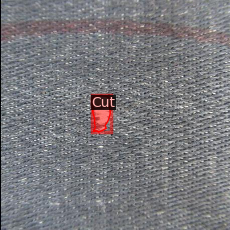

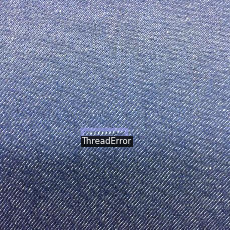

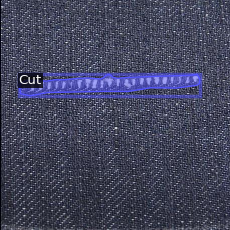

In [6]:
import random
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=textile_defect_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [7]:
from detectron2 import model_zoo


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("textile_defect",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 0
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 3000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[05/19 05:43:04 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:01, 96.2MB/s]                          
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[05/19 05:43:07 d2.engine.train_loop]: Starting training from iteration 0


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)


[05/19 05:43:17 d2.utils.events]:  eta: 0:15:54  iter: 19  total_loss: 1.706  loss_cls: 1.405  loss_box_reg: 0.04366  loss_rpn_cls: 0.2001  loss_rpn_loc: 0.03569    time: 0.3203  last_time: 0.3607  data_time: 0.0473  last_data_time: 0.0512   lr: 4.9953e-06  max_mem: 1897M
[05/19 05:43:31 d2.utils.events]:  eta: 0:15:48  iter: 39  total_loss: 1.692  loss_cls: 1.217  loss_box_reg: 0.08579  loss_rpn_cls: 0.2898  loss_rpn_loc: 0.03682    time: 0.3245  last_time: 0.3776  data_time: 0.0435  last_data_time: 0.0694   lr: 9.9902e-06  max_mem: 1897M
[05/19 05:43:38 d2.utils.events]:  eta: 0:15:46  iter: 59  total_loss: 1.251  loss_cls: 0.8875  loss_box_reg: 0.09756  loss_rpn_cls: 0.1723  loss_rpn_loc: 0.0657    time: 0.3265  last_time: 0.3813  data_time: 0.0476  last_data_time: 0.0646   lr: 1.4985e-05  max_mem: 1897M
[05/19 05:43:44 d2.utils.events]:  eta: 0:15:34  iter: 79  total_loss: 1.097  loss_cls: 0.5553  loss_box_reg: 0.06874  loss_rpn_cls: 0.2352  loss_rpn_loc: 0.1243    time: 0.3259  la

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("textile_defect", )
predictor = DefaultPredictor(cfg)

[05/19 06:01:46 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 6):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=textile_defect_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[6:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

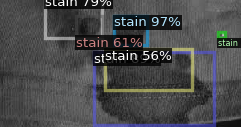

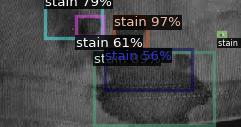

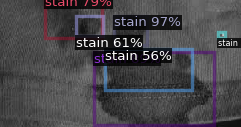

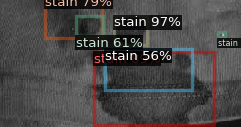

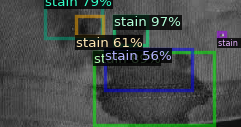

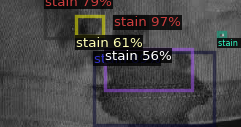

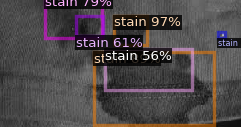

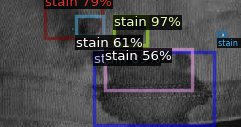

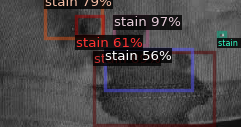

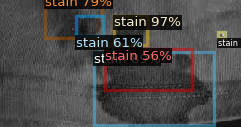

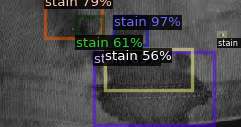

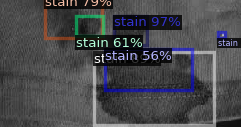

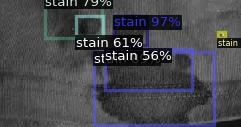

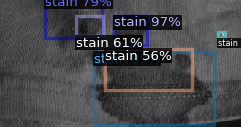

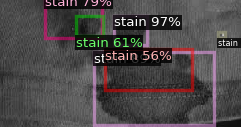

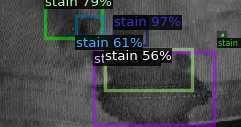

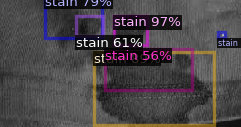

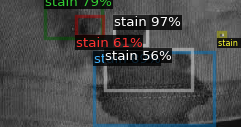

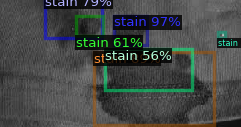

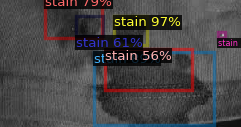

In [ ]:
from detectron2.utils.visualizer import ColorMode
image="/content/images.jpeg"
for d in (image):
    im = cv2.imread(image)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=Car_defect_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[6:, :, ::-1])

In [ ]:
img="/content/3ac5be3b3cc66d424160cc6e43e5b9ce.jpg"

# Validation Set

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("textile_defect_valid", {}, "/content/Fabric-defect-detection-3/valid/_annotations.coco.json", "/content/Fabric-defect-detection-3/valid/")

In [ ]:
textile_defect_metadata = MetadataCatalog.get("textile_defect_valid")
dataset_dicts = DatasetCatalog.get("textile_defect_valid")

WARNING [05/19 06:09:16 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/19 06:09:16 d2.data.datasets.coco]: Loaded 500 images in COCO format from /content/Fabric-defect-detection-3/valid/_annotations.coco.json


In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("textile_defect_valid", )
predictor = DefaultPredictor(cfg)

[05/19 06:09:52 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


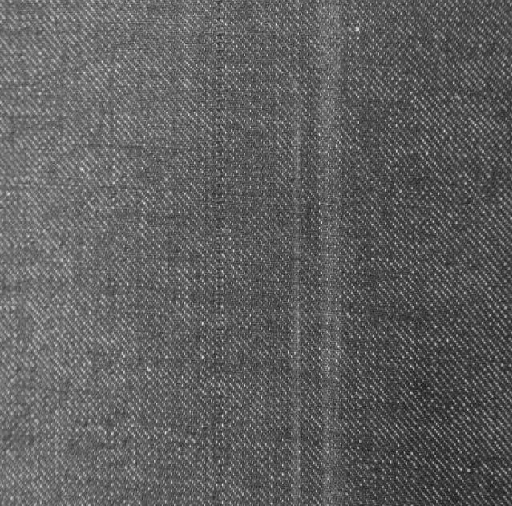

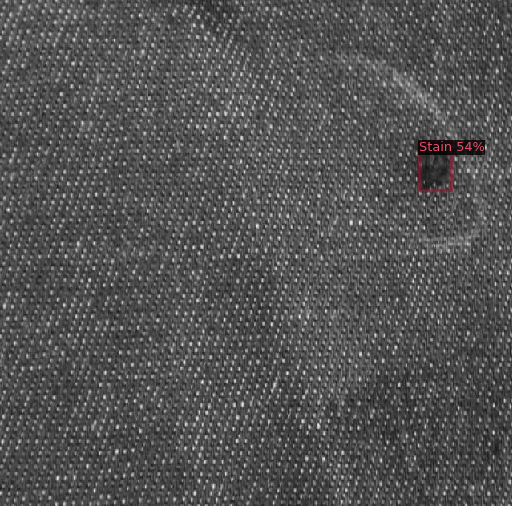

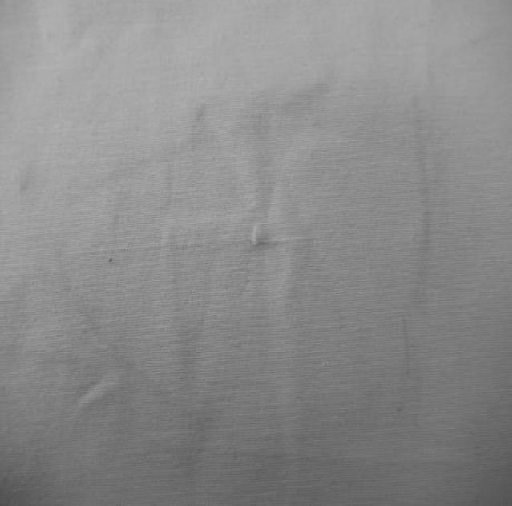

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=textile_defect_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[6:, :, ::-1])

# Test Set

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("textile_defect_test", {}, "/content/Fabric-defect-detection-3/test/_annotations.coco.json", "/content/Fabric-defect-detection-3/test/")

In [ ]:
textile_defect_metadata = MetadataCatalog.get("textile_defect_test")
dataset_dicts = DatasetCatalog.get("textile_defect_test")

WARNING [05/19 06:23:23 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/19 06:23:23 d2.data.datasets.coco]: Loaded 157 images in COCO format from /content/Fabric-defect-detection-3/test/_annotations.coco.json


In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("textile_defect_valid", )
predictor = DefaultPredictor(cfg)

[05/19 06:23:25 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


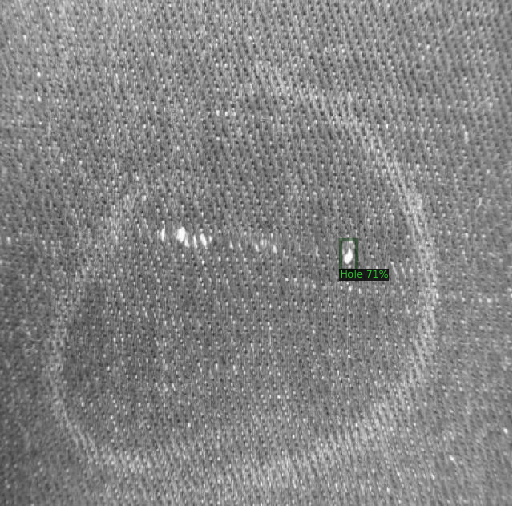

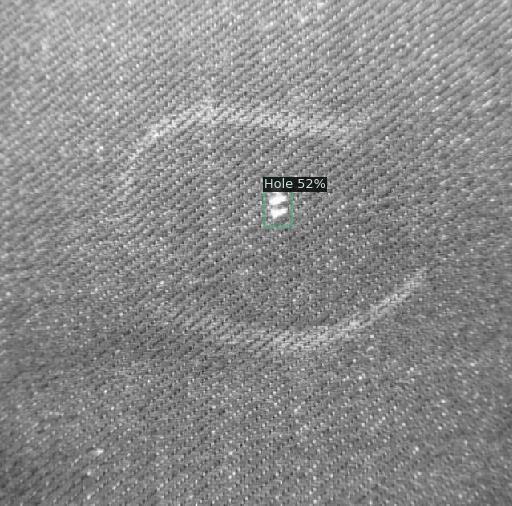

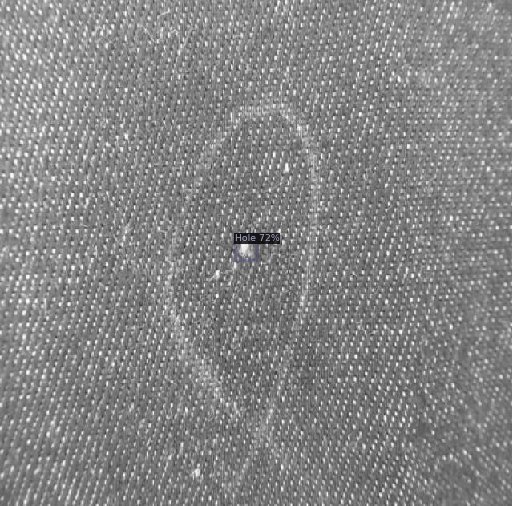

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=textile_defect_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[6:, :, ::-1])

# Train On Training and Test Sets

In [8]:
# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

In [11]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("textile_defect",)
cfg.DATASETS.TEST = ("textile_defect_test",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.05 # base learning rate

cfg.SOLVER.WARMUP_ITERS = 1000 # number of iteration
cfg.SOLVER.MAX_ITER = 3000
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256 # batch size per image
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4 #  your number of classes (Number of foreground classes)
cfg.TEST.EVAL_PERIOD = 500


In [14]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader

from detectron2.evaluation import COCOEvaluator, inference_on_dataset


cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("textile_defect_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "textile_defect_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

[05/19 08:13:12 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...
WARNING [05/19 08:13:13 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [05/19 08:13:13 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/19 08:13:13 d2.data.datasets.coco]: Loaded 157 images in COCO format from /content/Fabric-defect-detection-3/test/_annotations.coco.json
[05/19 08:13:13 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/19 08:13:13 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[05/19 08:13:13 d2.data.common]: Serializing 157 elements to byte tensors and concatenating them all ...
[05/19 08:13:13 d2.data.common

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


[05/19 08:13:16 d2.evaluation.evaluator]: Inference done 11/157. Dataloading: 0.0012 s/iter. Inference: 0.1827 s/iter. Eval: 0.0003 s/iter. Total: 0.1842 s/iter. ETA=0:00:26
[05/19 08:13:21 d2.evaluation.evaluator]: Inference done 38/157. Dataloading: 0.0030 s/iter. Inference: 0.1828 s/iter. Eval: 0.0004 s/iter. Total: 0.1863 s/iter. ETA=0:00:22
[05/19 08:13:26 d2.evaluation.evaluator]: Inference done 64/157. Dataloading: 0.0047 s/iter. Inference: 0.1843 s/iter. Eval: 0.0004 s/iter. Total: 0.1896 s/iter. ETA=0:00:17
[05/19 08:13:31 d2.evaluation.evaluator]: Inference done 91/157. Dataloading: 0.0040 s/iter. Inference: 0.1848 s/iter. Eval: 0.0004 s/iter. Total: 0.1894 s/iter. ETA=0:00:12
[05/19 08:13:36 d2.evaluation.evaluator]: Inference done 118/157. Dataloading: 0.0035 s/iter. Inference: 0.1853 s/iter. Eval: 0.0004 s/iter. Total: 0.1894 s/iter. ETA=0:00:07
[05/19 08:13:41 d2.evaluation.evaluator]: Inference done 144/157. Dataloading: 0.0040 s/iter. Inference: 0.1861 s/iter. Eval: 0.0

OrderedDict([('bbox',
              {'AP': 8.023197633001972,
               'AP50': 18.289251650566698,
               'AP75': 4.997811295627098,
               'APs': 4.300780094919452,
               'APm': 7.392868011770508,
               'APl': 11.991048376617536,
               'AP-fabric-defect': nan,
               'AP-Cut': 20.240230190447566,
               'AP-Hole': 10.53297816175337,
               'AP-Stain': 1.3195821798069562,
               'AP-ThreadError': 0.0})])

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("textile_defect_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("textile_defect_test")

from detectron2.utils.visualizer import ColorMode
import glob


for imageName in glob.glob('/content/Fabric-defect-detection-3/train/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata,
                scale=0.9
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 6):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=textile_defect_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[6:, :, ::-1])

In [ ]:
# Look at training curves in tensorboard:
tensorboard --logdir output